In [69]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from test_utils import test
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [53]:
class MyLinearRegression:
    """implementation of a linear regression model with 1d input with a similar signature as nn.Module
    """
    def __init__(self):
        self.w = torch.ones((1,), requires_grad=True)
        self.b = torch.zeros((1,), requires_grad=True)
        
    def forward(self, x):
        """compute predictions based on the inputs.
        Inputs:
            x: torch.Tensor of floats, shape (n) where n is the size of batch
        
        Returns:
            tensor of floats, shape (n)
            
        >>> model = MyLinearRegression()  
        >>> def test():
        ...   model.w.data.fill_(2)
        ...   model.b.data.fill_(3)
        ...   return model(torch.tensor([0.0, 1.0, 2.0])).tolist()
        >>> test()
        [3.0, 5.0, 7.0]
        """ 
        return self.w * x + self.b
    
    def parameters(self):
        """returns a list of model's parameters 
        
        Returns:
            list of model parameters
            
        >>> model = MyLinearRegression()  
        >>> model.b in model.parameters() and model.w in model.parameters()
        True
        """
        return [self.w, self.b]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)

In [54]:
test(MyLinearRegression.forward)
test(MyLinearRegression.parameters)

✅ Your `forward` passes some basic tests.
✅ Your `parameters` passes some basic tests.


In [55]:
def mselossfunc(pred, y):
    """the MSE loss function
    Inputs:
        pred: tensor of floats, shape (n)
        y: tensor of floats, shape (n)
    
    Returns:
        a single-element tensor, the average of MSEs
    
    >>> mselossfunc(torch.tensor([1., 3.]), torch.tensor([3., 2.])).tolist()
    2.5
    """
    return torch.mean((y - pred)**2)

In [56]:
test(mselossfunc)

✅ Your `mselossfunc` passes some basic tests.


In [57]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):
    
    """train a model for num_epoch epochs on the given data
    
    Inputs:
        features: a numpy array
        labels: a numpy array
        model: an instance of nn.Module (or classes with similar signature)
        lossfunc: a function : (prediction outputs, correct outputs) -> loss
        optimizer: an instance of torch.optim.Optimizer
        num_epoch: an int
    """
    # Step 1 - create torch variables corresponding to features and labels
    features = torch.from_numpy(features)
    labels = torch.from_numpy(labels)
    
    for epoch in range(num_epoch):
        # Step 2 - compute model predictions and loss
        y_pred = model(features)
        loss = lossfunc(y_pred, labels)
        
        # Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 17.1957
Epoch [11/50], Loss: 3.0396
Epoch [21/50], Loss: 0.7159
Epoch [31/50], Loss: 0.3341
Epoch [41/50], Loss: 0.2711


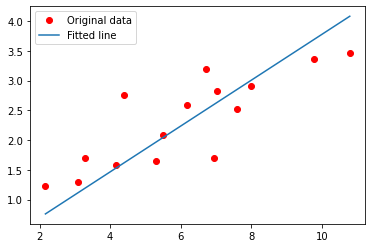

In [58]:
# Training and visualizing predictions made by linear regression model
model = MyLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (as nn.Module)

In [62]:
class NNLinearRegression(nn.Module):
    """implementation of a linear regression model with 1d input as a nn.Module
    """
    def __init__(self):
        # call the super class init function. PyTorch needs this to initialize the model.
        super().__init__()
        # Define the parameters of the model (weights and biases) and initialize them
        self.w = nn.Parameter(torch.zeros((1,)))
        self.b = nn.Parameter(torch.zeros((1,)))
        
    def forward(self, x):
        """compute predictions based on the inputs.
        Inputs:
            x: torch.Tensor of floats, shape (n) where n is the size of batch
        
        Returns:
            tensor of floats, shape (n)
            
        >>> model = MyLinearRegression()  
        >>> def test():
        ...   model.w.data.fill_(2)
        ...   model.b.data.fill_(3)
        ...   return model(torch.tensor([0.0, 1.0, 2.0])).tolist()
        >>> test()
        [3.0, 5.0, 7.0]
        """ 
        return self.w * x + self.b

In [60]:
test(NNLinearRegression.forward)

✅ Your `forward` passes some basic tests.


Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 1.1699
Epoch [21/50], Loss: 0.3857
Epoch [31/50], Loss: 0.2567
Epoch [41/50], Loss: 0.2352


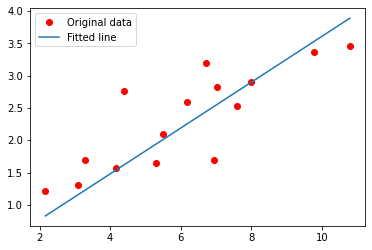

In [61]:
# Training and visualizing predictions made by linear regression model
model = NNLinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 5.9630
Epoch [11/100], Loss: 1.1289
Epoch [21/100], Loss: 0.3355
Epoch [31/100], Loss: 0.2052
Epoch [41/100], Loss: 0.1838
Epoch [51/100], Loss: 0.1802
Epoch [61/100], Loss: 0.1796
Epoch [71/100], Loss: 0.1795
Epoch [81/100], Loss: 0.1794
Epoch [91/100], Loss: 0.1793


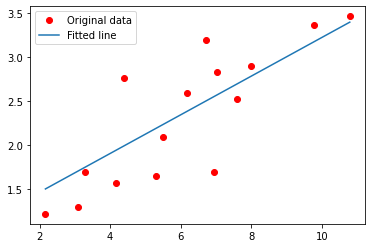

In [73]:
# Training and visualizing predictions made by linear regression model (nn package)

# Using pre-existing modules from nn package, create a 1d linear regression model
model = torch.nn.Linear(1,1)


# use loss function from nn package
lossfunc = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=100)
visualize(x_train, y_train, model)

## MLP

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1/300], Loss: 6.2733
Epoch [11/300], Loss: 0.4906
Epoch [21/300], Loss: 0.4769
Epoch [31/300], Loss: 0.4652
Epoch [41/300], Loss: 0.4532
Epoch [51/300], Loss: 0.4405
Epoch [61/300], Loss: 0.4270
Epoch [71/300], Loss: 0.4127
Epoch [81/300], Loss: 0.3975
Epoch [91/300], Loss: 0.3814
Epoch [101/300], Loss: 0.3645
Epoch [111/300], Loss: 0.3469
Epoch [121/300], Loss: 0.3289
Epoch [131/300], Loss: 0.3107
Epoch [141/300], Loss: 0.2927
Epoch [151/300], Loss: 0.2753
Epoch [161/300], Loss: 0.2589
Epoch [171/300], Loss: 0.2438
Epoch [181/300], Loss: 0.2304
Epoch [191/300], Loss: 0.2189
Epoch [201/300], Loss: 0.2093
Epoch [211/300], Loss: 0.2015
Epoch [221/300], Loss: 0.1957
Epoch [231/300], Loss: 0.2195
Epoch [241/300], Loss: 0.2285
Epoch [251/300], Loss: 0.2230
Epoch [261/300], Loss: 0.2220
Epoch [271/300], Loss: 0.2190
Epoch [281/300], Loss: 0.2170
Epoch [291/300], Loss: 0.2147


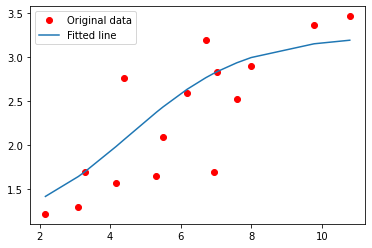

In [74]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        y = self.fc1(x)
        y = self.fc2(y)
        y = F.sigmoid(y)
        return self.fc3(y)
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = .1

model = MLP(hidden_size=hidden_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=300)
visualize(x_train, y_train, model)

## Reproducibility
Since parameters are usually initialized randomly, 
running the same code twice will produce different outputs.
This makes it hard to debug the code or re-use it in the future by others.
To alleviate this problem, we can manually set the random seed at the beginning of the code. 

In [43]:
"""
Set the numpy and torch random seed to a fixed number. 
"""
def set_seed(seed):
    """
    >>> set_seed(45)
    >>> x = torch.randn(1).item()
    >>> set_seed(45)
    >>> torch.randn(1).item() == x
    True
    """
    np.random.seed(seed)
    torch.manual_seed(seed)

In [44]:
test(set_seed)

✅ Your `set_seed` passes some basic tests.
